**Accelerated Solution Design**

1. [Introduction](#id3)
2. [Epic and User Stories](#id3)
   1. [Epic: Epic name](#id3.1)
      1. [US: User story name](#id3.1.1)
   2. [Epic: Epic name](#id3.2)
2. [Architecture](#id5)
   1. [C4 architecture diagrams](#id5.1)
   2. [UML Diagrams](#id5.2)
3. [Configuration](#id6)

In [1]:
from DECODER_API import extractSessionHeader
from IPython.display import display

extractSessionHeader()


Press intro: to log in: ·················································································


In [3]:
from widget_funcs import show_project_widget
import ipywidgets as widgets
from DECODER_API import selectProject

projectW = show_project_widget()

display(projectW)

selectProject(projectW.value)

Dropdown(description='Project:', options=('mythaistar', 'admintest', 'CVEList', 'mts_demo_22', 'testRunningJML…

## Epic and User Stories<a name="id3"></a>

In [3]:
from DECODER_API import getAllEpics
from IPython.display import display, HTML, Javascript
import re

markdownData = getAllEpics('User-Stories.asciidoc.txt') 

regexEpics = re.findall("(Epic:)(.*)(\n)", markdownData)

# Get all entries
i = 0
drawnEpics=[];
for reg in regexEpics:
    if reg[1] not in drawnEpics:
        drawnEpics.append(reg[1])
        display(HTML("<H2>" +reg[0] + reg[1]+ "</H2>"))
        i = i + 1


### User Stories:

'Error with US'

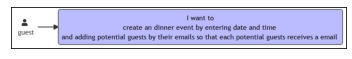

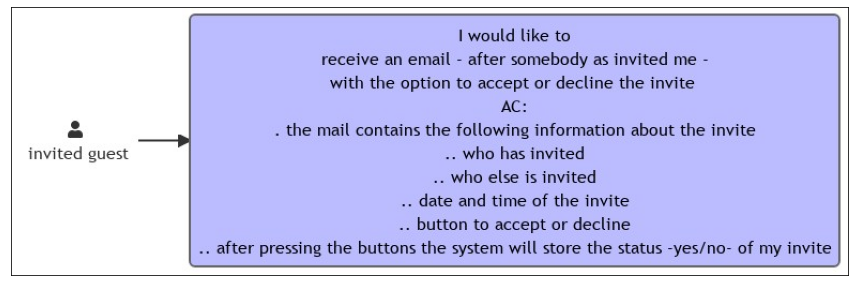

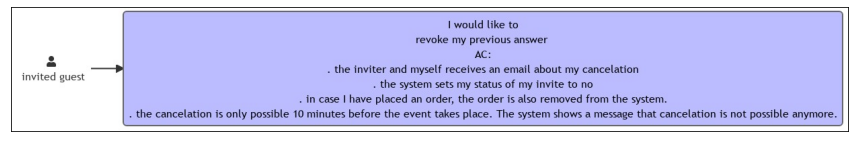

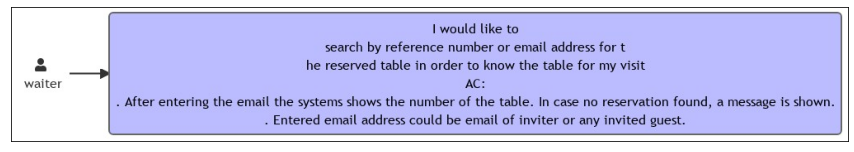

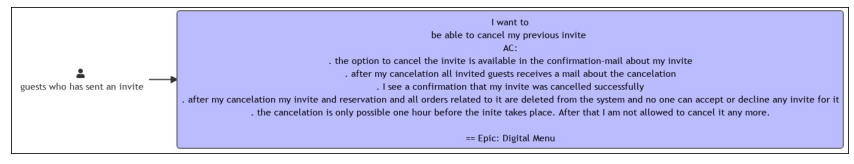

<Figure size 1080x1080 with 0 Axes>

In [4]:
from DECODER_API import getAllUserStories
import re
import base64
import requests, io
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Javascript


def printUS(graphList:list)-> None:
    count = 0;
    for graph in graphList:
        graphbytes = graph.encode("ascii")
        base64_bytes = base64.b64encode(graphbytes)
        base64_string = base64_bytes.decode("ascii")
        img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
        ax=plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.rcParams['figure.figsize'] = [15, 15]
        plt.imshow(img)
        plt.figure()
        count = count +1
        
def generateUSGraph(user, iwant, soI, ac)-> str:
    text5 = soI
    if len(text5)>50:
        text5= text5[:50] + "<br>" + text5[50:]
    return """flowchart LR
        id1((fa:fa-user <br>"""+user+"""))-->id2("""+iwant+"""<br> """ +text5+ """<br> """ + ac + """)
        style id1 stroke:#fff,fill:#fff, stroke-width:4px, padding :2px
        style id2 fill:#bbf,stroke:#666,stroke-width:2px,color:#000"""
    

markdownData = getAllUserStories('User-Stories.asciidoc.txt') 

markdownUS = markdownData.split("US:")

i = 0
drawnUS=[];
for reg1 in markdownUS:
    regexUs= re.findall("(.*)(As )(an|a)(.*)(I would like to|I want to)(.*)(so|so that|in order to|\. )(.|\n)*(AC|Details|Acceptance criteria)(.*|\n*|.*\n*)*(\n\n)", reg1)  
    graph =''
    for match in regexUs:
        idx = -1
        if 'AC:' in reg1:
            idx =reg1.index('AC:')
        elif 'Acceptance Criteria:' in reg1:
            idx =reg1.index('Acceptance Criteria')

 
        ac = reg1[idx: len(reg1)-5];
        ac = ''.join(ac).replace("\n","<br>").replace("\"","").replace("(","-").replace(")","-").replace(";",".").replace('@','--')
        graph = generateUSGraph(match[3], match[4], match[5], ac)
       
        if graph:     
            drawnUS.append(graph)
try:        
    printUS(drawnUS)
except:
    display('Error with US')

## Architecture<a name="id5"></a>


### C4 architecture diagrams<a name="id5.1"></a>

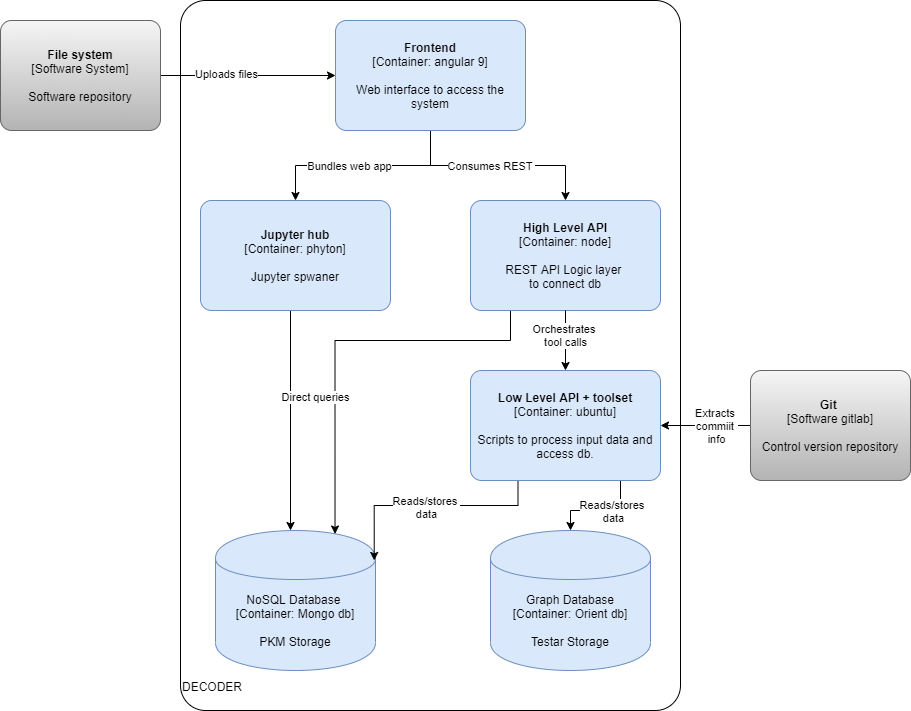

In [4]:
from DECODER_API import getPicturesWithName
from IPython.display import Image, display
import base64

content = getPicturesWithName("C4")

for entry in content:
    imgdata = base64.b64decode(entry)
    display(Image(data=imgdata))

### UML Diagrams<a name="id5.2"></a>

In [8]:
from DECODER_API import getAllUML, printMermaidList

def printUML(graphList:list)-> None:
    count = 0;
    for graph in graphList:
        graphbytes = graph.encode("ascii")
        base64_bytes = base64.b64encode(graphbytes)
        base64_string = base64_bytes.decode("ascii")
        img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
        ax=plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.rcParams['figure.figsize'] = [15, 15]
        plt.imshow(img)
        plt.figure()
        count = count +1

entries = getAllUML()
UMLs= []
for entry in entries:
    #entry_in_html = json2html.convert(json=entry)
    UMLs.append(entry['diagram'])
printMermaidList(UMLs)    

NameError: name 'base64' is not defined

## Configuration<a name="id6"></a>

In [5]:
from IPython.display import Markdown
from DECODER_API import getProjectReadMe
content = getProjectReadMe()
display(Markdown(content))

= My Thai Star

develop: image:https://travis-ci.com/devonfw/my-thai-star.svg?branch=develop["build-status",link="https://travis-ci.com/devonfw/my-thai-star"]

Live URL : https://mts-devonfw-core.cloud.okteto.net/

This repository is an **ADCS Capgemini** initiative that hosts an application reference called **My Thai Star**. This application is about the management of a restaurant.

== Technologies

This project is intended to be an example for the usage of new technologies in web development. Here is a list of all technologies involved:

* **Angular**

Client-side developed using the latest version of this framework: Angular 10.

* **Java**

Server-side developed using the 2020.08.001 version of **devon4j**.

* **Node**

Server-side developed using the basics of the NestJS framework. A node.js framework built on top of Express.js based on TypeScript language. This server-side backend is based on the **devon4node** incubator.

* **.NET**

Server-side developed using the **dotnet** framework.

* **Swagger**

Used this technology to define contracts between client-side(s) and server-side(s). So necessary when every back-end of the project (.NET, NodeJS and Java) is prepared to match with the Angular client exactly in the same way, being transparent to the user.

* **Production Line**

Tool used for Continuous Integration and Continuous Delivery. Inside of this Jenkins and SonarQube are used. Also used **Docker** for the deployment in an external server.

* **Mr Checker**

MrChecker is a testing framework included in devonfw with several useful modules, from which we will focus on the Selenium Module, a module designed to make end-to-end testing easier to implement. More about it link:https://github.com/devonfw/devonfw-testing/wiki[here].

=== Deprecated

Some folders have been marked as __deprecated__. They have not been removed for information purposes and in case it is necessary to recover previous work. They are the following:

- graphQL
- serverless 

Use them at your own risk. 

== Deployment

=== From code

This application can be easily deployed using **Docker** and **docker-compose**.

`$ docker-compose up`

As both **Angular** and **Java** `Dockerfile`(s) are using **multi-stage build**, apps are being built in their development environments (`node` for Angular and `maven` for Java) and then deployed in `nginx` and `tomcat` respectively.

3 Docker containers will be created:

```
CONTAINER ID        IMAGE                      COMMAND                  CREATED             STATUS              PORTS                                        NAMES
23921e672489        mythaistar_java            "catalina.sh run"        3 minutes ago       Up 3 minutes        8080/tcp                                     mts_java
1acf2d6b6653        mythaistar_reverse-proxy   "nginx -g 'daemon of…"   3 minutes ago       Up 3 minutes        0.0.0.0:443->443/tcp, 0.0.0.0:8080->80/tcp   mts_reverse_proxy
fdb63e26d299        mythaistar_angular         "nginx -g 'daemon of…"   3 minutes ago       Up 3 minutes        80/tcp, 443/tcp                              mts_angular
```

The usage of the `reverse-proxy` only uses 1 port of the Docker host (where this is deployed), the `8080`. All internal communication of containers is done using docker alias of services.

=== From artifact

If we are using a CICD pipeline and we store the artifact on nexus, we can also deploy it without recompile all code. For this purpose there are three deployment pipelines:

- deployment: deploy all application with a reserve-proxy
- java: deploy only the java application
- angular: deploy angular application + reverse-proxy (you must run the java deployment at least once before running this deployment)

The result of this deployment will be the same as in the deployment from code, but instead of compiling the artifact again downloads it from nexus. All resources (docker-compose.yml, Dockerfiles and nginx.conf) are stored in the reverse-proxy folder.
